<a href="https://colab.research.google.com/github/NerdManV/Physics/blob/main/ProjectileMotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

╒══════════╤═════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╕
│ Time     │   0 │   1    │   2    │   3    │   4    │   5    │   6    │   7    │   8    │   9    │  10    │  11    │  12    │  13    │  14    │  15    │  16    │  17    │  18    │  19    │  20    │  21    │  22    │  23    │
├──────────┼─────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│ Distance │   0 │ 316.32 │ 446.32 │ 530.74 │ 594.31 │ 646.04 │ 690.17 │ 728.94 │ 763.59 │ 794.74 │ 822.7  │ 847.63 │ 869.68 │ 889    │ 905.78 │ 920.25 │ 932.67 │ 943.26 │ 952.27 │ 959.91 │ 966.38 │ 971.84 │ 976.45 │ 980.33 │
├──────────┼─────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼──────

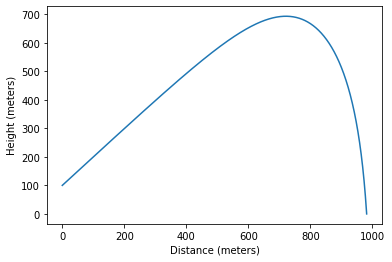

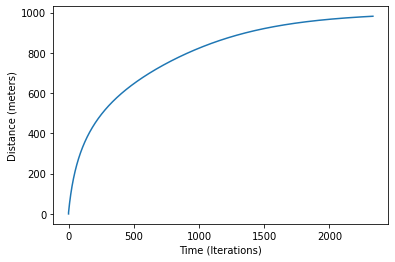

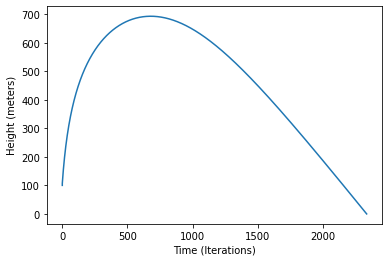

One second is 100 iterations
Time in air for launched projectile minus time in air for dropped projectile: 18.62 seconds


In [ ]:
#Lucas Vigil

#Projectile Motion with Drag

import math
import matplotlib
import tabulate

#Variables: Initial velocity, launch angle, launch height, mass, combined drag coeficient (C and A), 
#Constants: air density, gravity (g)

TimeStep = 0.01 #time between iterations, in seconds
Vi=1000 #launch velocity in m/s
V=Vi
degrees = 45 #launch angle in degrees
theta= (degrees/180.) * math.pi #convert to radians
h=100 #launch height
Px = [0] #Initialize List for X Position with initial position
Py = [h] #Initialize List for Y Position  with initial height
Vx= Vi * math.cos(theta) #X component of initial velocity
Vy= Vi * math.sin(theta) #Y component of initial velocity
m= 100 #mass of object, in kg
g= 9.8 #acceleration due to gravity, in m/s^2
rho = 1.225 #density of air, in kg/m^3
C = 1 #drag constant
A = 0.5 #cross sectional area, in m^2
D = C * A * rho / (2*m) #Combined drag coefficient for use in later functions

def AccelX(Vx, V, D): #acceleration in x direction
 if Vx== 0:
   Ax= 0
 else:
   Ax= -D*(V**2)* (Vx / V)
 return Ax

def AccelY(Vy, V, D, g): #acceleration in y direction
 if Vy != 0: #at height of motion, python doesn't like dividing by zero
  Ay= -D*(V**2)*(Vy / V) -g
 else:
  Ay= -g
 return Ay

def VelocityX(Vx, V, D, TimeStep): #velocity in x direction
 k1= TimeStep * AccelX(Vx, V, D) #Dummy variables for Runge-Kutta
 k2= TimeStep * AccelX(Vx + 0.5 * k1, V, D)
 NewVx= Vx + (k2)
 return NewVx
 
def VelocityY(Vy, V, D, g, TimeStep): #velocity in y direction
 k1= TimeStep * AccelY(Vy, V, D, g)
 k2= TimeStep * AccelY(Vy + 0.5 * k1, V, D, g)
 NewVy= Vy + (k2)
 return NewVy

def VelocityTotal(Vx, Vy): #total velocity
  if Vx!=0 or Vy!=0:
    V= abs((Vx**2 +Vy**2)**(0.5))
  else:
    V=1
  return V

def PositionX(Px, Vx, D, TimeStep): #x position (distance)
 k1= TimeStep * VelocityX(Vx, V, D, TimeStep)
 k2= TimeStep * VelocityX(Vx + 0.5 * k1, V, D, TimeStep)
 NewPx = Px + k2
 return NewPx

def PositionY(Py, Vy, D, g, TimeStep): #y position (height)
 k1= TimeStep * VelocityY(Vy, V, D, g, TimeStep)
 k2= TimeStep * VelocityY(Vy + 0.5 * k1, V, D, g, TimeStep)
 NewPy = Py + k2
 return NewPy

TablePx = ["Distance", 0] #initialize list for table of x positions
TablePy = ["Height", h] ##initialize list for table of x positions
Seconds = ["Time", 0] #Initialize list of times at every second
i=0 #start list iteration at 0
iterations= [0]

while Py[i] >= 0.0: 
 #update velocities
 V = VelocityTotal(Vx, Vy)
 Vx = VelocityX(Vx, V, D, TimeStep)
 Vy = VelocityY(Vy, V, D, g, TimeStep)
 #update position and add value to each list
 Px.append(PositionX(Px[i], Vx, D, TimeStep))
 Py.append(PositionY(Py[i], Vy, D, g, TimeStep))
 iterations.append(i)
 i+=1
 if int(TimeStep * i) == float(TimeStep * i):
   Seconds.append(TimeStep*i)
   TablePx.append(round(Px[i], 2))
   TablePy.append(round(Py[i], 2))
print(tabulate.tabulate([Seconds, TablePx, TablePy], tablefmt= "fancy_grid"))
T1 = (TimeStep * i)
print("Time in air is", round(TimeStep * i, 2), "seconds")


#plot the lists as a graph
#Graph of height vs distance
MaxHeight= max(Py)
MaxDistance= max(Px)
print("Max height is", round(MaxHeight, 2), "meters and distance at landing is", round(MaxDistance, 2), "meters")
matplotlib.pyplot.plot(Px, Py)
matplotlib.pyplot.ylabel("Height (meters)")
matplotlib.pyplot.xlabel("Distance (meters)")
#if MaxHeight > MaxDistance:
 #matplotlib.pyplot.axis([0, math.floor(MaxHeight) +1, 0, math.floor(MaxHeight) +1]) #uncomment for equal x and y axis
#else:
 #matplotlib.pyplot.axis([0, math.floor(MaxDistance) +1, 0, math.floor(MaxDistance) +1]) #uncomment for equal x and y axis
matplotlib.pyplot.show()

#Graph of distance vs time
matplotlib.pyplot.plot(iterations, Px)
matplotlib.pyplot.ylabel("Distance (meters)")
matplotlib.pyplot.xlabel("Time (Iterations)")
matplotlib.pyplot.show()

#Graph of height vs time
matplotlib.pyplot.plot(iterations, Py)
matplotlib.pyplot.ylabel("Height (meters)")
matplotlib.pyplot.xlabel("Time (Iterations)")
matplotlib.pyplot.show()
print("One second is", int(1/TimeStep), "iterations")

#restart projectile motion for dropped object (Vi=0)
Px = [0] #Initialize List for X Position with initial position
Py = [h] #Initialize List for Y Position  with initial height
Vx= 0
Vy= 0
i=0 #start list iteration at zero
while Py[i] >= 0.0: 
 #update velocities
 V = VelocityTotal(Vx, Vy)
 Vx = VelocityX(Vx, V, D, TimeStep)
 Vy = VelocityY(Vy, V, D, g, TimeStep)
 #update position and add value to each list
 Px.append(PositionX(Px[i], Vx, D, TimeStep))
 Py.append(PositionY(Py[i], Vy, D, g, TimeStep))
 i+=1
 
T2 = (TimeStep * i)
print("Time in air for launched projectile minus time in air for dropped projectile:", round(T1-T2, 2), "seconds")